### KIA

In [2]:
import yfinance as yf

KIA = yf.download('000270.KS',
                  start = '1990-01-01',
                  end = '2023-12-31',
                  )
KIA.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5074.384766,636300
2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,4798.227051,686100
2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,4591.109863,379000
2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4487.551270,701400
2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,4694.668457,1076700


In [3]:
KIA = KIA[["Close"]]
KIA = KIA.reset_index()
KIA.columns = ['ds', 'y']
KIA.head()

,ds,y
0,2000-01-04,7665.241699
1,2000-01-05,7248.085449
2,2000-01-06,6935.218262
3,2000-01-07,6778.785156
4,2000-01-10,7091.651855


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
m = Prophet()
m.fit(KIA)
future = m.make_future_dataframe(periods=300)
future.tail()

10:20:45 - cmdstanpy - INFO - Chain [1] start processing
10:20:47 - cmdstanpy - INFO - Chain [1] done processing


,ds
6312,2024-10-19
6313,2024-10-20
6314,2024-10-21
6315,2024-10-22
6316,2024-10-23


In [6]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-04,6821.540950,-2806.536462,14315.390221,6821.540950,6821.540950,-999.851063,-999.851063,-999.851063,-99.717459,-99.717459,-99.717459,-900.133604,-900.133604,-900.133604,0.0,0.0,0.0,5821.689887
1,2000-01-05,6824.456175,-2431.062870,13380.765599,6824.456175,6824.456175,-1031.410383,-1031.410383,-1031.410383,-131.902777,-131.902777,-131.902777,-899.507606,-899.507606,-899.507606,0.0,0.0,0.0,5793.045792
2,2000-01-06,6827.371400,-3035.612349,14337.429767,6827.371400,6827.371400,-1039.048247,-1039.048247,-1039.048247,-145.613118,-145.613118,-145.613118,-893.435129,-893.435129,-893.435129,0.0,0.0,0.0,5788.323153
3,2000-01-07,6830.286625,-2747.379123,14013.343642,6830.286625,6830.286625,-1032.727164,-1032.727164,-1032.727164,-150.617836,-150.617836,-150.617836,-882.109328,-882.109328,-882.109328,0.0,0.0,0.0,5797.559461
4,2000-01-10,6839.032300,-1990.929098,13474.899963,6839.032300,6839.032300,-1072.898888,-1072.898888,-1072.898888,-252.360484,-252.360484,-252.360484,-820.538404,-820.538404,-820.538404,0.0,0.0,0.0,5766.133413


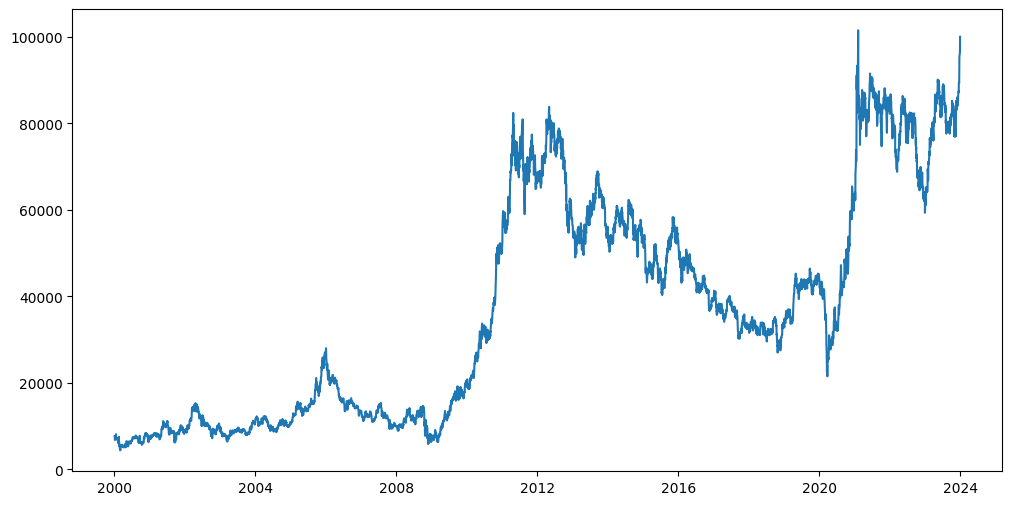

In [7]:
plt.figure(figsize=(12,6))
plt.plot(KIA['ds'], KIA['y'])
plt.show()

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


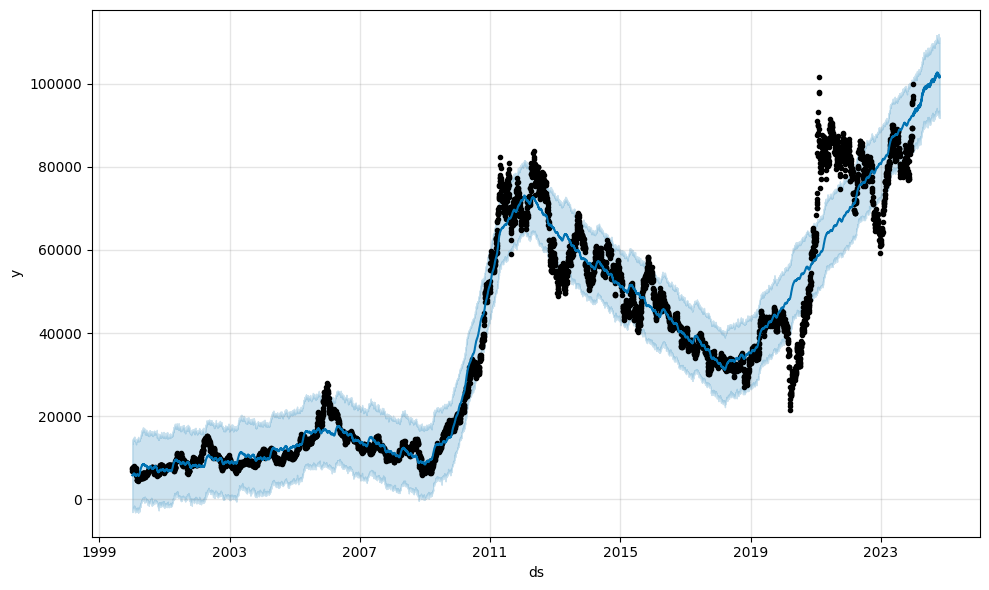

In [8]:
m.plot(forecast);

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

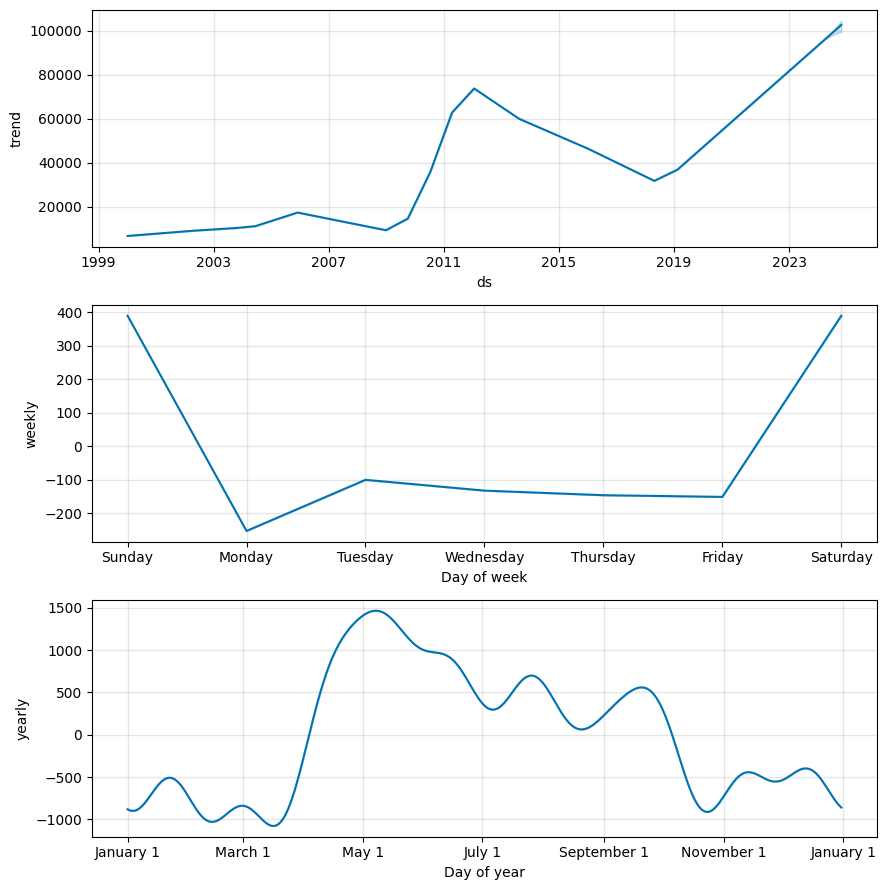

In [9]:
m.plot_components(forecast);

## Tesla

In [10]:
tesla = yf.download('TSLA',
                    start='2010-06-29',
                    end='2023-12-31',
                    )
tesla.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [11]:
tesla = tesla[["Close"]]
tesla = tesla.reset_index()
tesla.columns = ['ds', 'y']
tesla.head()

m = Prophet()
m.fit(tesla)
future = m.make_future_dataframe(periods=300)
forecast = m.predict(future)

10:25:14 - cmdstanpy - INFO - Chain [1] start processing
10:25:15 - cmdstanpy - INFO - Chain [1] done processing


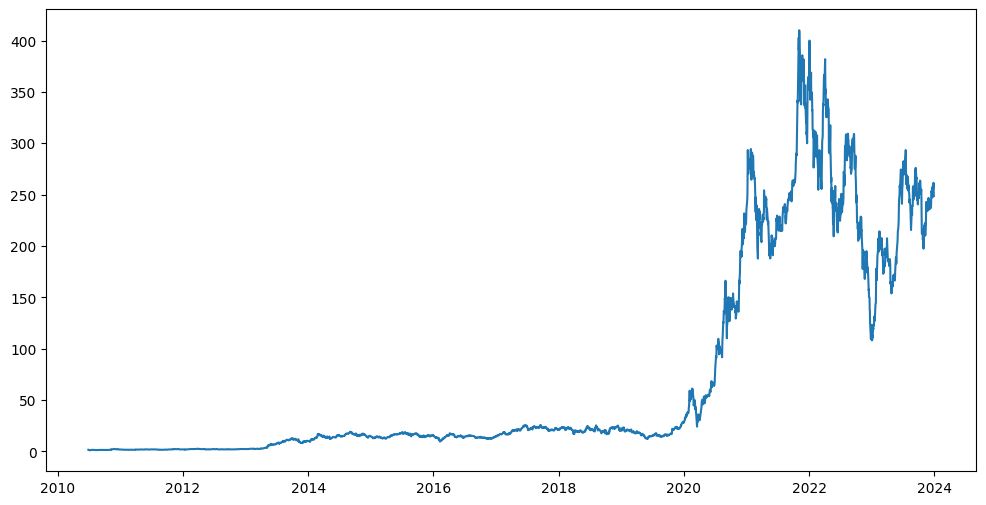

In [12]:
plt.figure(figsize=(12,6))
plt.plot(tesla['ds'], tesla['y'])
plt.show()

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


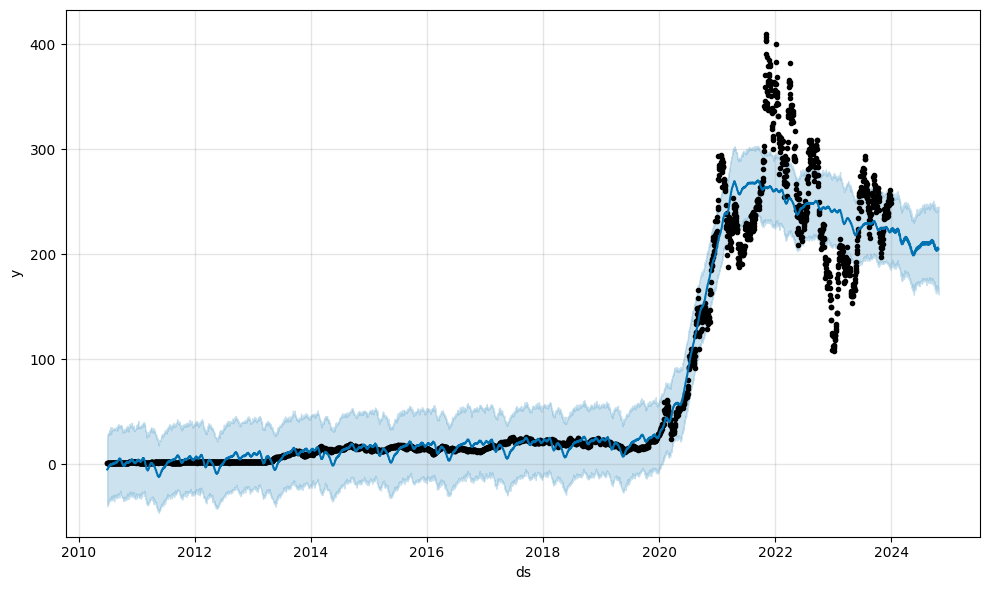

In [13]:
m.plot(forecast);

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

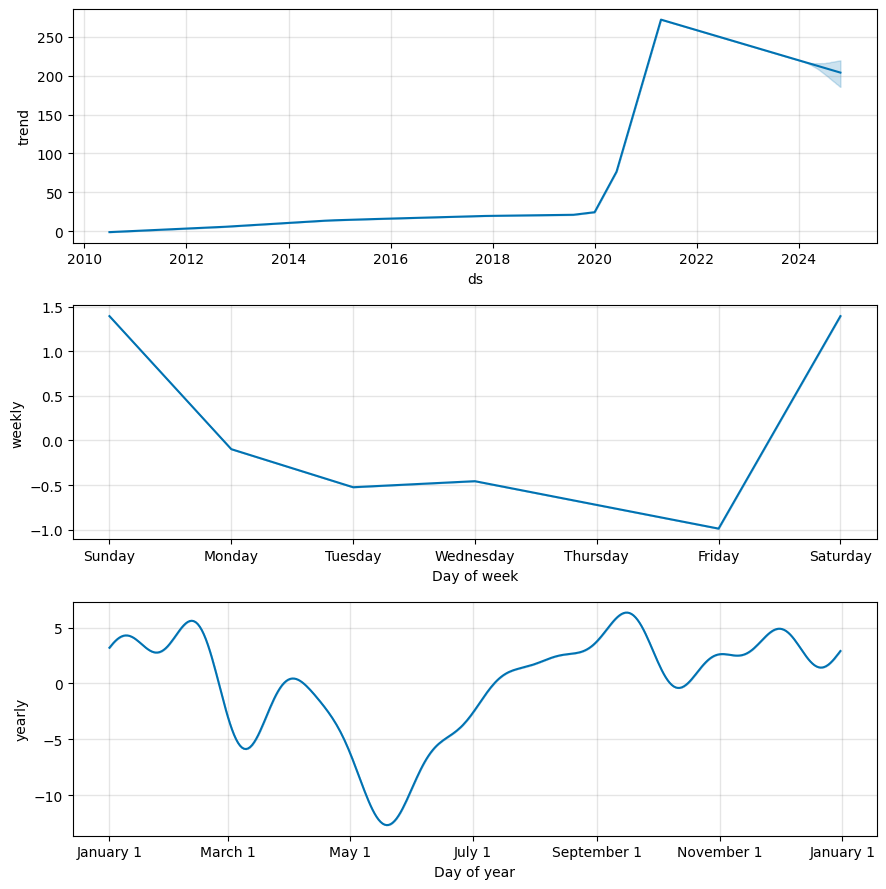

In [14]:
m.plot_components(forecast);

## 삼전

In [19]:

import yfinance as yf

samsung = yf.download('005930.KS',
                  start = '2020-01-01',
                  end = '2023-12-31',
                  )
samsung.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,49542.542969,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,49811.789062,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,49811.789062,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,50081.042969,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,50978.558594,23501171


In [20]:
samsung = samsung[["Close"]]
samsung = samsung.reset_index()
samsung.columns = ['ds', 'y']
samsung.head()

,ds,y
0,2020-01-02,55200.0
1,2020-01-03,55500.0
2,2020-01-06,55500.0
3,2020-01-07,55800.0
4,2020-01-08,56800.0


In [21]:
m = Prophet()
m.fit(samsung)
future = m.make_future_dataframe(periods=300)
forecast = m.predict(future)

10:46:02 - cmdstanpy - INFO - Chain [1] start processing
10:46:02 - cmdstanpy - INFO - Chain [1] done processing


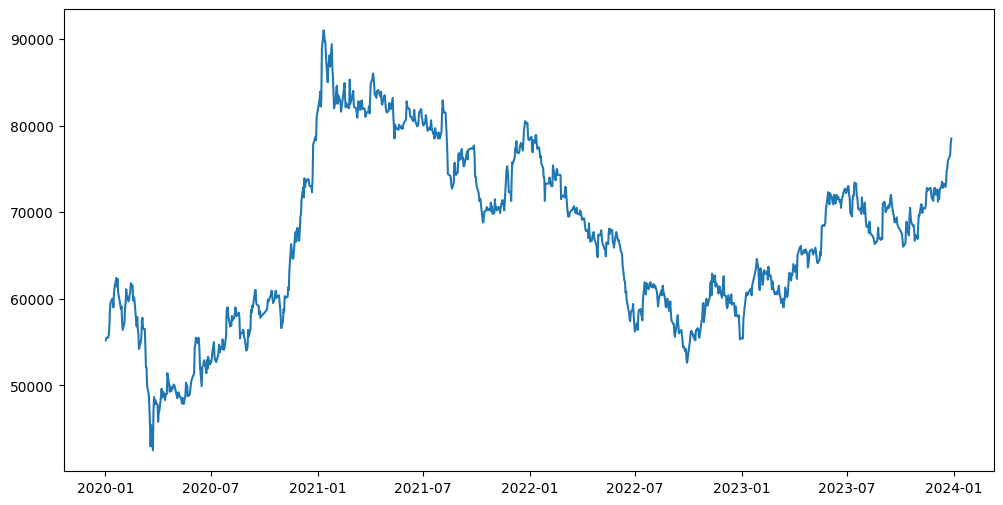

In [22]:
plt.figure(figsize=(12,6))
plt.plot(samsung['ds'], samsung['y'])
plt.show()

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


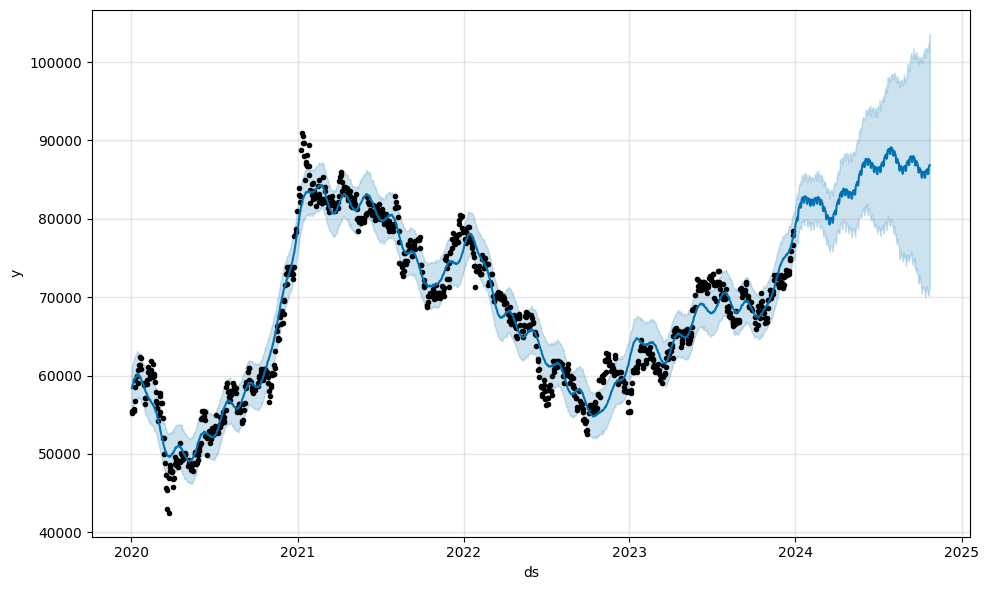

In [23]:
m.plot(forecast);

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

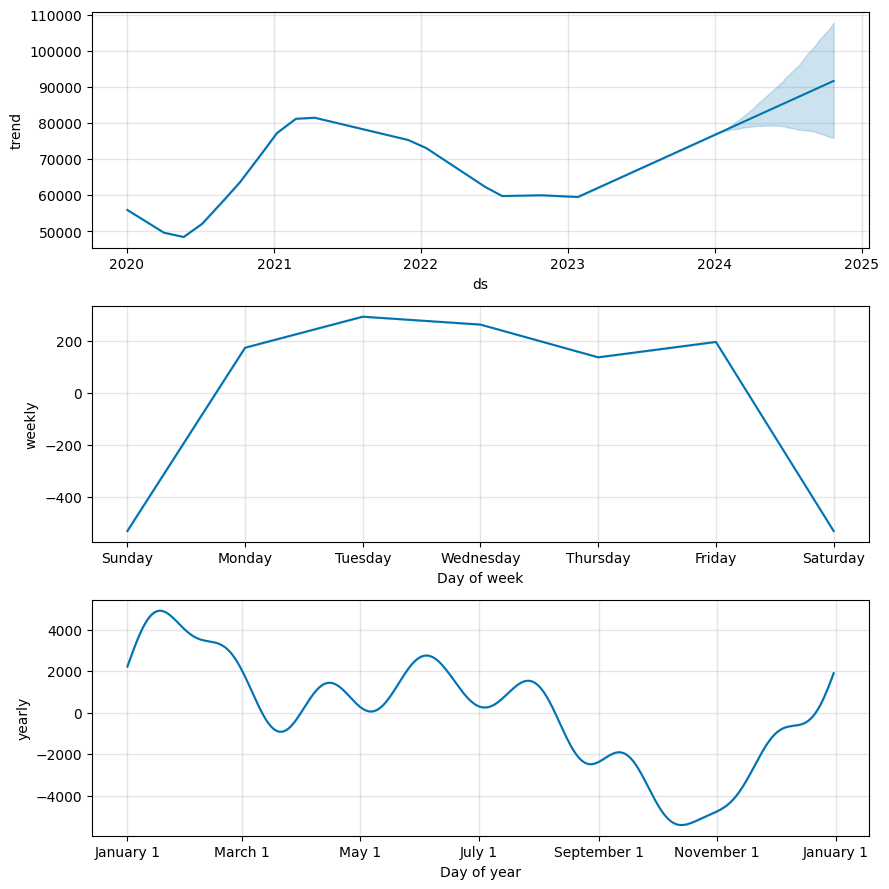

In [24]:
m.plot_components(forecast);